In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

### Reading csv files

In [2]:
chw_reserve_df = pd.read_csv('Data/chw_reserve.csv')
chw_reserve_df.name = 'Chwiggy Reservations'
yom_reserve_df = pd.read_csv('Data/yom_reserve.csv')
yom_reserve_df.name = 'Yomato Reservations'
chw_store_info_df = pd.read_csv('Data/chw_store_info.csv')
chw_store_info_df.name = 'Chwiggy Store Info'
yom_store_info_df = pd.read_csv('Data/yom_store_info.csv')
yom_store_info_df.name = 'Yomato Store Info'
date_info_df = pd.read_csv('Data/date_info.csv').rename(columns={'calendar_date': 'visit_date'})
date_info_df.name = 'Holidays'
store_id_relation_df = pd.read_csv('Data/store_id_relation.csv')
store_id_relation_df.name = 'Store ID Relation'
train_df = pd.read_csv('Data/train.csv')
train_df.name = 'Training Data'

# **EXPLORATORY DATA ANALYSIS**
---
# Check for Missing data

In [3]:
dfList = [chw_reserve_df, yom_reserve_df, chw_store_info_df, yom_store_info_df, date_info_df, store_id_relation_df, train_df]
for df in dfList:
    print(df.name + ': \n')
    print(df.isnull().sum(), "\n")

Chwiggy Reservations: 

chw_store_id        0
visit_datetime      0
reserve_datetime    0
reserve_visitors    0
dtype: int64 

Yomato Reservations: 

yom_store_id        0
visit_datetime      0
reserve_datetime    0
reserve_visitors    0
dtype: int64 

Chwiggy Store Info: 

chw_store_id      0
chw_genre_name    0
chw_area_name     0
latitude          0
longitude         0
dtype: int64 

Yomato Store Info: 

yom_store_id      0
yom_genre_name    0
yom_area_name     0
latitude          0
longitude         0
dtype: int64 

Holidays: 

visit_date     0
day_of_week    0
holiday_flg    0
dtype: int64 

Store ID Relation: 

chw_store_id    0
yom_store_id    0
dtype: int64 

Training Data: 

chw_store_id    0
visit_date      0
visitors        0
dtype: int64 



### *No null values in the data*

# Descriptive statistics

In [4]:
for df in dfList:
    print(df.name + ': \n')
    print(df.describe(), "\n")

Chwiggy Reservations: 

       reserve_visitors
count      92378.000000
mean           4.481749
std            4.919669
min            1.000000
25%            2.000000
50%            3.000000
75%            5.000000
max          100.000000 

Yomato Reservations: 

       reserve_visitors
count      1.048575e+06
mean       4.888651e+00
std        5.092817e+00
min        1.000000e+00
25%        2.000000e+00
50%        3.000000e+00
75%        6.000000e+00
max        1.000000e+02 

Chwiggy Store Info: 

         latitude   longitude
count  829.000000  829.000000
mean    35.647042  137.415311
std      2.084659    3.650971
min     33.211967  130.195555
25%     34.695124  135.341564
50%     35.658068  139.685474
75%     35.694003  139.751599
max     44.020632  144.273398 

Yomato Store Info: 

          latitude    longitude
count  4690.000000  4690.000000
mean     35.810261   137.675816
std       2.138755     3.197233
min      33.311645   130.339313
25%      34.692109   135.498859
50%      3

In [5]:
air = chw_reserve_df.copy()
hpg = yom_reserve_df.copy()

In [6]:
# Separate visit date and time into separate columns
air['visit_datetime'] = pd.to_datetime(air['visit_datetime'])
air['visit_date'] = air['visit_datetime'].dt.date
air['visit_time'] = air['visit_datetime'].dt.time

hpg['visit_datetime'] = pd.to_datetime(hpg['visit_datetime'])
hpg['visit_date'] = hpg['visit_datetime'].dt.date
hpg['visit_time'] = hpg['visit_datetime'].dt.time

# Separate reservation date and time into separate columns
air['reserve_datetime'] = pd.to_datetime(air['reserve_datetime'])
air['reserve_date'] = air['reserve_datetime'].dt.date
air['reserve_time'] = air['reserve_datetime'].dt.time

hpg['reserve_datetime'] = pd.to_datetime(hpg['reserve_datetime'])
hpg['reserve_date'] = hpg['reserve_datetime'].dt.date
hpg['reserve_time'] = hpg['reserve_datetime'].dt.time

In [7]:
# Group the reservations by visit date to get the total number of reservations
air_reservations = air.groupby(['visit_date'])['reserve_visitors'].sum()
hpg_reservations = hpg.groupby(['visit_date'])['reserve_visitors'].sum()

<AxesSubplot:xlabel='visit_date', ylabel='Number of visitors'>

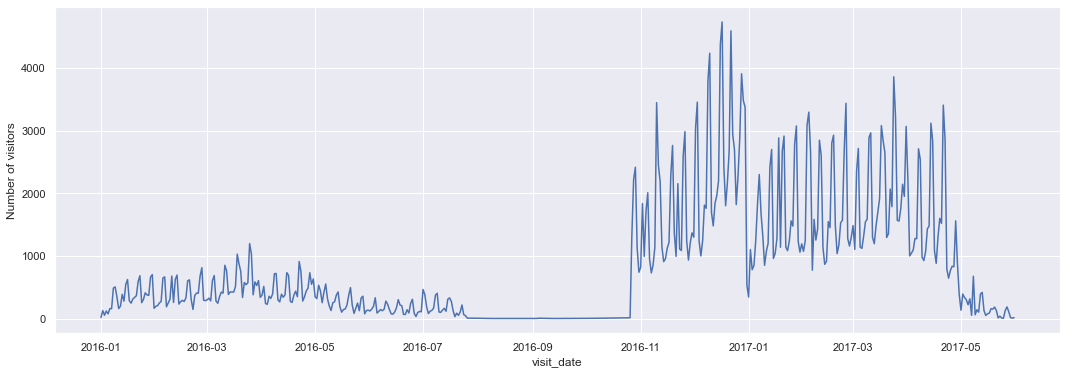

In [8]:
# Plot the total number of reservations by visit date for both stores on different plots
sns.set(rc={'figure.figsize':(18, 6)})
plt.ylabel('Number of visitors')
air_reservations.plot(x='visit_date', y='reserve_visitors')


<AxesSubplot:xlabel='visit_date', ylabel='Number of visitors'>

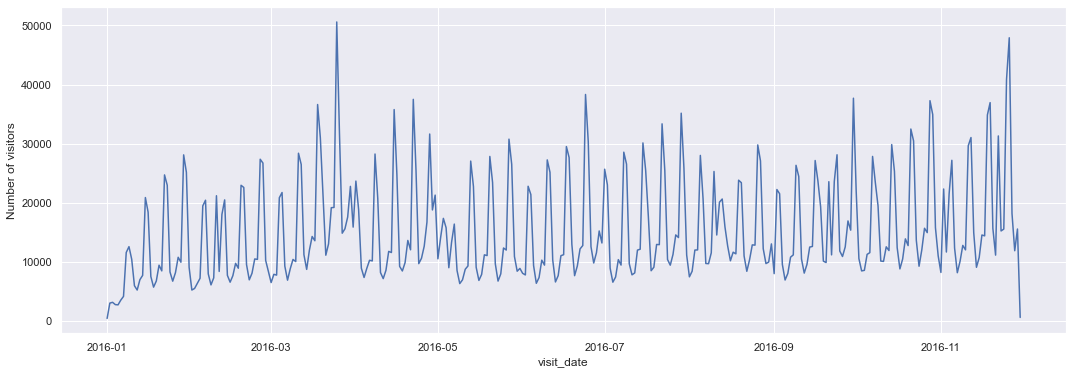

In [9]:
sns.set(rc={'figure.figsize':(18, 6)})
plt.ylabel('Number of visitors')
hpg_reservations.plot(x='visit_date', y='reserve_visitors')

In [10]:
air_reservations_time = air.groupby(['visit_time'])['reserve_visitors'].sum()
hpg_reservations_time = hpg.groupby(['visit_time'])['reserve_visitors'].sum()
# print(hpg_reservations_time)

<AxesSubplot:xlabel='visit_time'>

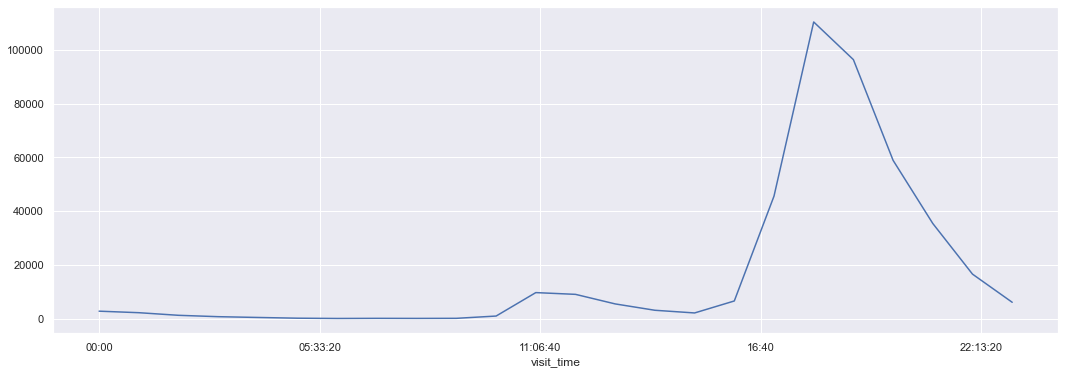

In [11]:
air_reservations_time.plot(x='visit_time', y='reserve_visitors')

 We observe that there is a trend that the number of reserved visitors is highest at 8PM-9PM
 . Similar trend is observed for visitors booking through yomato.

<AxesSubplot:xlabel='visit_time'>

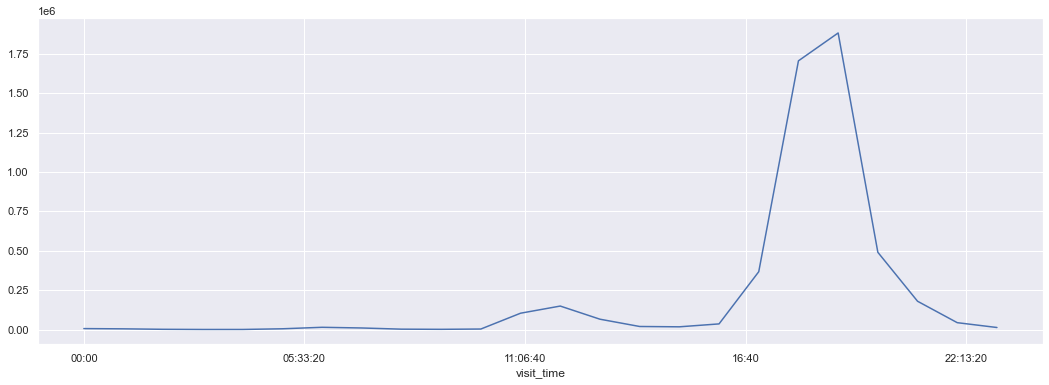

In [12]:
hpg_reservations_time.plot(x='visit_time', y='reserve_visitors')

# Holidays

In [13]:
all_dates = date_info_df.copy()
t = train_df[['visit_date','visitors']]
t  = t.groupby('visit_date').sum().reset_index()
t['visit_date'] = pd.to_datetime(t['visit_date'])
holidays = all_dates[all_dates['holiday_flg'] == 1]
# # print(holidays)
holidays = holidays.rename(columns = {"calendar_date":"visit_date"})
holidays['visit_date'] = pd.to_datetime(holidays['visit_date'])
merge_holiday_visitors = pd.merge(t,holidays,on='visit_date')
# print(merge_holiday_visitors)

print(t['visit_date'])
# print(holidays['visit_date'].dtype)


0     2016-01-01
1     2017-01-01
2     2016-01-10
3     2017-01-10
4     2016-01-11
         ...    
458   2016-09-05
459   2016-09-06
460   2016-09-07
461   2016-09-08
462   2016-09-09
Name: visit_date, Length: 463, dtype: datetime64[ns]


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

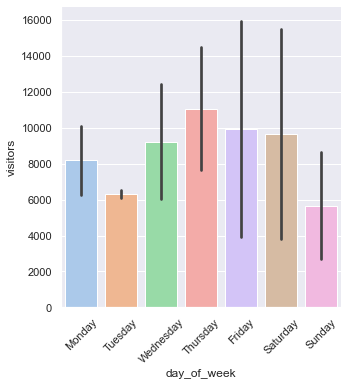

In [14]:
merge_holiday_visitors.shape
ordered_weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.catplot(kind = "bar" , x = 'day_of_week',y = 'visitors' , data = merge_holiday_visitors , palette= sns.color_palette("pastel"), order=ordered_weekdays)
plt.xticks(rotation = 45)


<AxesSubplot:xlabel='day_of_week', ylabel='count'>

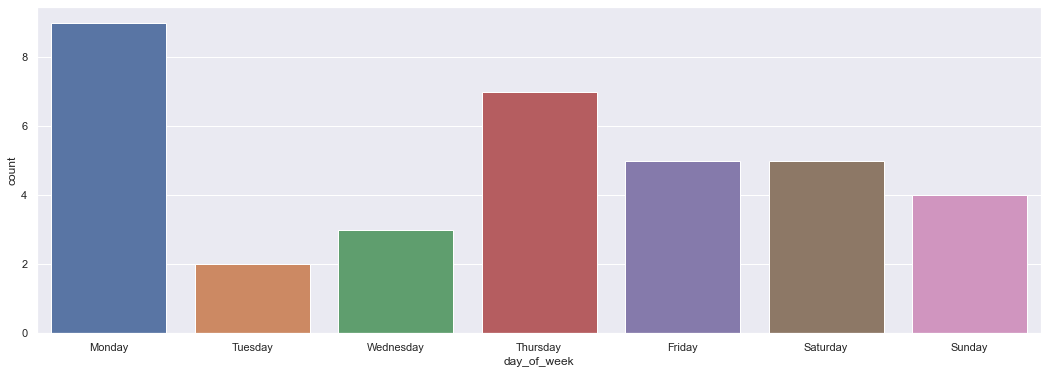

In [15]:
# holidays.groupby('day_of_week').sum().reindex(ordered_weekdays).plot(kind='bar')

ordered_weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

holidays.groupby('day_of_week').sum().reindex(ordered_weekdays)
sns.countplot(x='day_of_week', data=holidays, order=ordered_weekdays)

In [16]:
print(t.columns)

Index(['visit_date', 'visitors'], dtype='object')


<AxesSubplot:xlabel='visit_date', ylabel='visitors'>

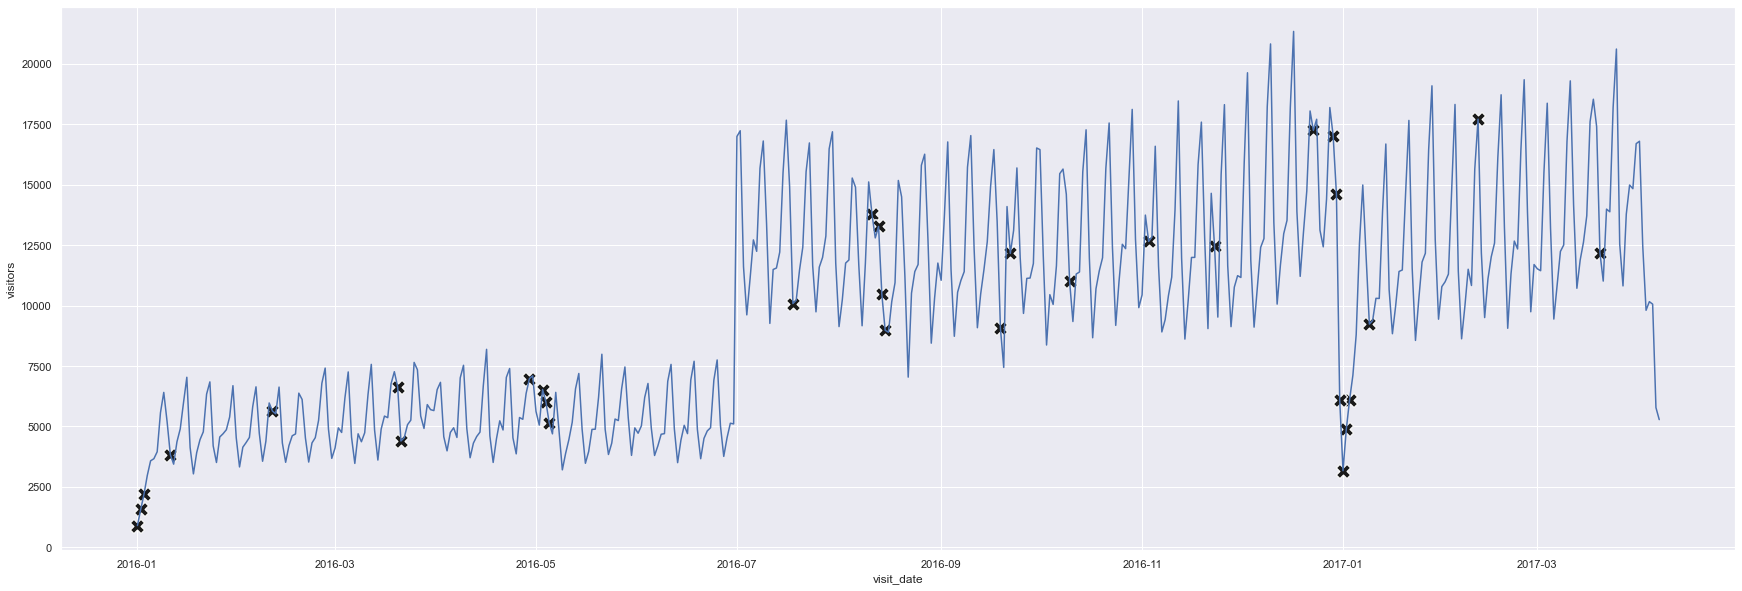

In [17]:
sns.set(rc={'figure.figsize':(30, 10)})
ax = sns.lineplot(data=t, x='visit_date', y='visitors')
sns.scatterplot(x = 'visit_date', y = 'visitors', data=merge_holiday_visitors, ax=ax, marker='X', color='k', s=200)

# Number of visitors by restaurant

In [18]:
air = air.drop(['visit_datetime','visit_time','reserve_datetime','reserve_time','reserve_date'], axis=1)
hpg = hpg.drop(['visit_datetime','visit_time','reserve_datetime','reserve_time','reserve_date'], axis=1)

In [19]:
air_stores = air.groupby('chw_store_id')['reserve_visitors', 'visit_date'].sum()
air_stores = air_stores.sort_values(by='reserve_visitors')
print(air_stores)

hpg_stores = hpg.groupby('yom_store_id')['reserve_visitors', 'visit_date'].sum()
hpg_stores = hpg_stores.sort_values(by='reserve_visitors')
print(hpg_stores)
# print(hpg_stores['yom_store_id'].unique())


C:\Users\Anirudh\AppData\Local\Temp/ipykernel_3240/2571298364.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  air_stores = air.groupby('chw_store_id')['reserve_visitors', 'visit_date'].sum()
C:\Users\Anirudh\AppData\Local\Temp/ipykernel_3240/2571298364.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  hpg_stores = hpg.groupby('yom_store_id')['reserve_visitors', 'visit_date'].sum()


                      reserve_visitors
chw_store_id                          
air_cc35590cd1da8554                 1
air_5485912b44f976de                 2
air_f0fb0975bdc2cdf9                 2
air_ab9746a0f83084b7                 2
air_e657ca554b0c008c                 2
...                                ...
air_3bb99a1fe0583897              7321
air_326ca454ef3558bc              7385
air_8093d0b565e9dbdf              7458
air_03963426c9312048              8200
air_e55abd740f93ecc4              8355

[314 rows x 1 columns]
                      reserve_visitors
yom_store_id                          
hpg_1ac9c64caa725879                 1
hpg_eb3c815b26438534                 2
hpg_5ffd22b35f1b6bf4                 2
hpg_5a1958a40cb2093f                 2
hpg_b55e0e506bb5df8d                 2
...                                ...
hpg_8dd2dd08e9d709b2              1761
hpg_2a2d0c1a882b5c21              1785
hpg_6446d8b349b2d625              1807
hpg_4bc649e72e2a239a              1862
h

In [20]:
merged_chw_stores = pd.merge(air_stores, store_id_relation_df, on='chw_store_id', how='outer')
merged_chw_stores

,chw_store_id,reserve_visitors,yom_store_id
0,air_cc35590cd1da8554,1.0,NaN
1,air_5485912b44f976de,2.0,NaN
2,air_f0fb0975bdc2cdf9,2.0,hpg_0cd7a0f13e73b043
3,air_ab9746a0f83084b7,2.0,NaN
4,air_e657ca554b0c008c,2.0,hpg_5c05683a8f326588
...,...,...,...
328,air_968d72c12eed09f0,NaN,hpg_4dabe28f13a5b993
329,air_32c61b620a766138,NaN,hpg_d5ca709664abea20
330,air_d00161e19f08290b,NaN,hpg_05fada27f04e4383
331,air_09661c0f3259cc04,NaN,hpg_ef517ab154f66a8e


<AxesSubplot:xlabel='chw_store_id'>

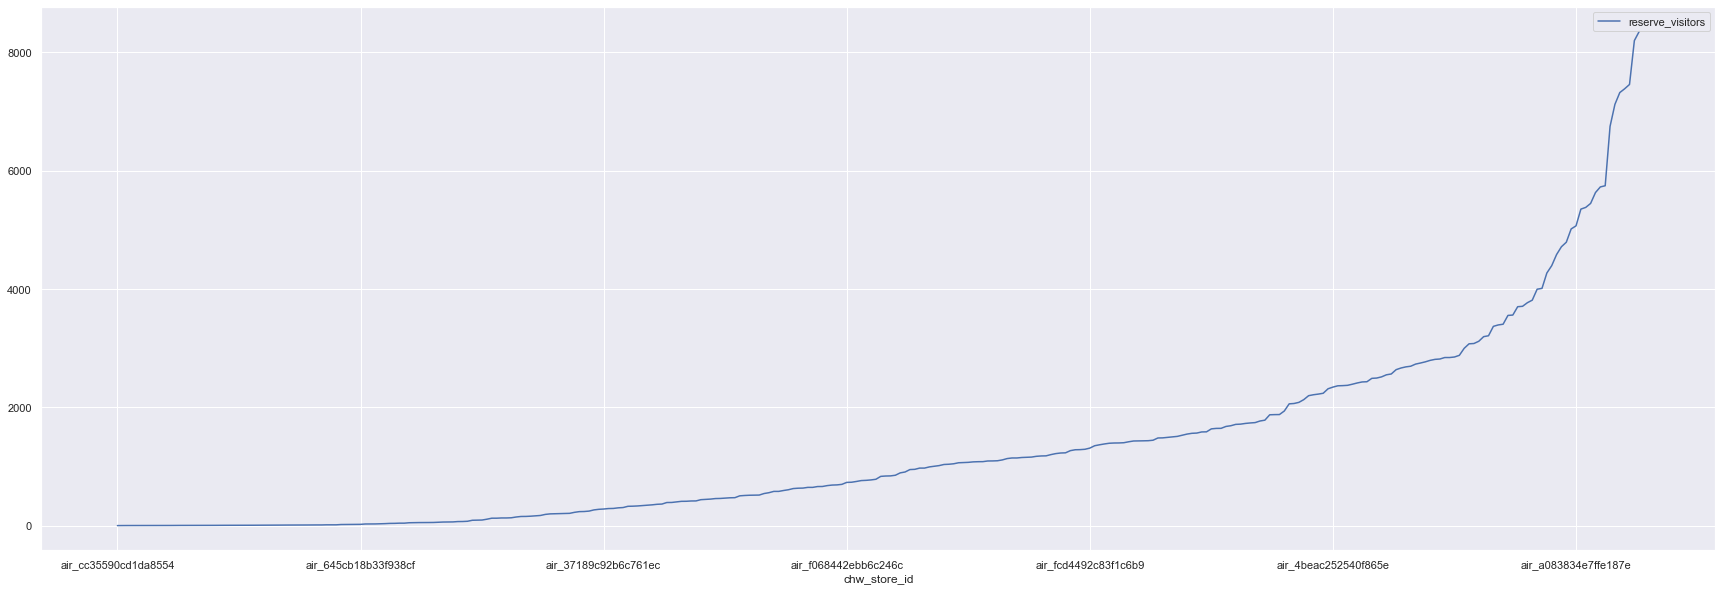

In [21]:
merged_chw_stores.plot(kind='line', x='chw_store_id', y='reserve_visitors')

In [22]:
merged_yom_stores = pd.merge(hpg_stores, store_id_relation_df, on='yom_store_id', how='outer')
merged_yom_stores

,yom_store_id,reserve_visitors,chw_store_id
0,hpg_1ac9c64caa725879,1,NaN
1,hpg_eb3c815b26438534,2,NaN
2,hpg_5ffd22b35f1b6bf4,2,NaN
3,hpg_5a1958a40cb2093f,2,NaN
4,hpg_b55e0e506bb5df8d,2,NaN
...,...,...,...
12716,hpg_8dd2dd08e9d709b2,1761,NaN
12717,hpg_2a2d0c1a882b5c21,1785,NaN
12718,hpg_6446d8b349b2d625,1807,NaN
12719,hpg_4bc649e72e2a239a,1862,air_63b13c56b7201bd9


<AxesSubplot:xlabel='yom_store_id'>

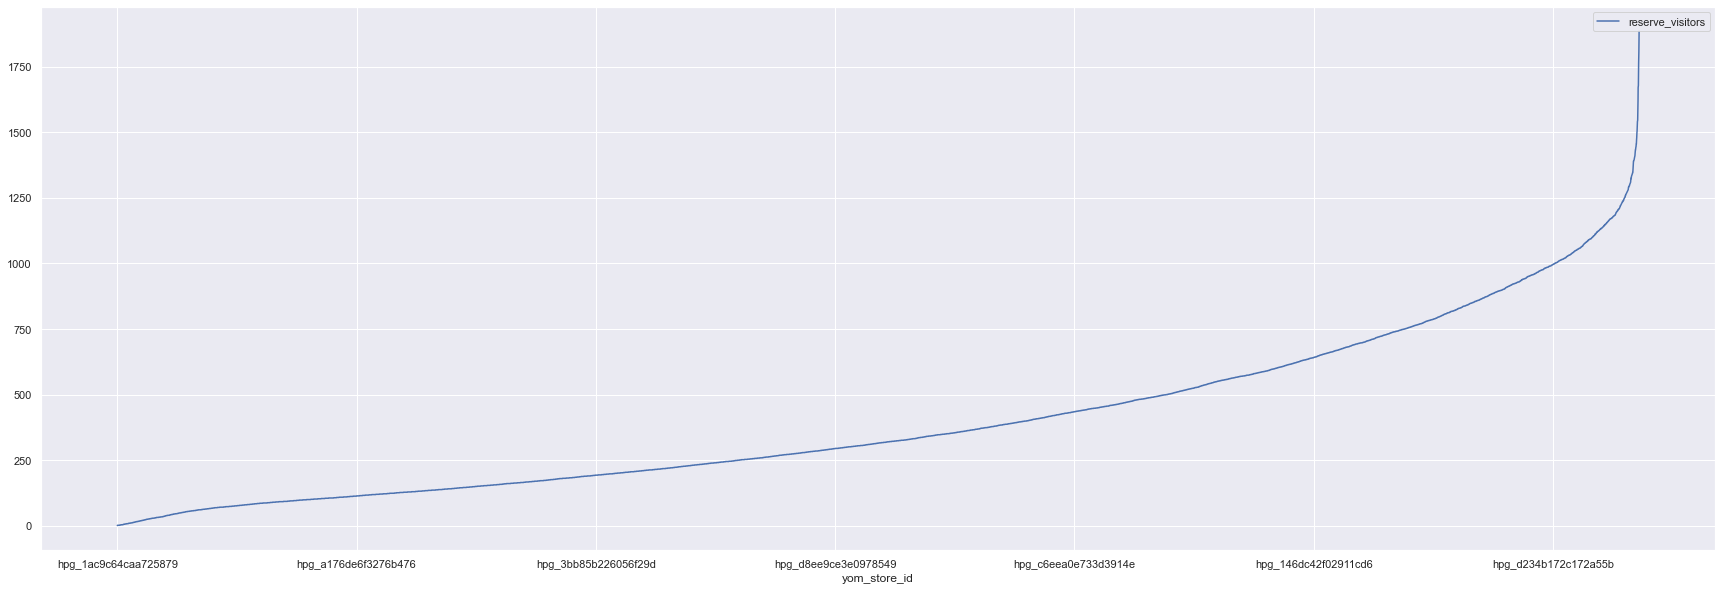

In [23]:
merged_yom_stores.plot(kind='line', x='yom_store_id', y='reserve_visitors')

# Number of visitors by Area and Genre

### 1. For Chwiggy

In [24]:
chw_store_info_df.head()

,chw_store_id,chw_genre_name,chw_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


In [25]:
chw_store_info_df_cpy = chw_store_info_df.copy()
chw_store_info_df = chw_store_info_df.drop(['latitude','longitude'],axis= 1,inplace=False)
chw_store_info_df.head()

,chw_store_id,chw_genre_name,chw_area_name
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen


In [26]:
merge_chwAreaname_mergedStores = pd.merge(chw_store_info_df, merged_yom_stores, on='chw_store_id', how='inner')
merge_chwAreaname_mergedStores.head()

,chw_store_id,chw_genre_name,chw_area_name,yom_store_id,reserve_visitors
0,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,hpg_9b38b9e13da6da27,697
1,air_290e7a57b390f78e,Italian/French,Tōkyō-to Minato-ku Shibakōen,hpg_c5ec63f52e4a7e9e,294
2,air_638c35eb25e53eea,Italian/French,Fukuoka-ken Fukuoka-shi Daimyō,hpg_f07ec7b288165b27,759
3,air_fcfbdcf7b1f82c6e,Italian/French,Tōkyō-to Shibuya-ku Shibuya,hpg_0b53e00789c2eafe,556
4,air_f8233ad00755c35c,Italian/French,Tōkyō-to Shibuya-ku Shibuya,hpg_098e4dd30e54fee6,699


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 [Text(0, 0, 'Hyōgo-ken Kōbe-shi Kumoidōri'),
  Text(1, 0, 'Tōkyō-to Minato-ku Shibakōen'),
  Text(2, 0, 'Fukuoka-ken Fukuoka-shi Daimyō'),
  Text(3, 0, 'Tōkyō-to Shibuya-ku Shibuya'),
  Text(4, 0, 'Hiroshima-ken Hiroshima-shi Kokutaijimachi'),
  Text(5, 0, 'Tōkyō-to Chūō-ku Ginza'),
  Text(6, 0, 'Tōkyō-to Shinjuku-ku Kabukichō'),
  Text(7, 0, 'Tōkyō-to Tachikawa-shi Izumichō'),
  Text(8, 0, 'Fukuoka-ken Fukuoka-shi Hakata Ekimae'),
  Text(9, 0, 'Shizuoka-ken Hamamatsu-shi Motoshirochō'),
  Text(10, 0, 'Tōkyō-to Minato-ku Akasaka'),
  Text(11, 0, 'Tōkyō-to Chūō-ku Tsukiji'),
  Text(12, 0, 'Hyōgo-ken Kakogawa-shi Kakogawachō Kitazaike'),
  Text(13, 0, 'Tōkyō-to Chiyoda-ku Kudanminami'),
  Text(14, 0, 'Hokkaidō Asahikawa-shi 6 Jōdōri'),
  Text(15, 0, 'Ōsaka-fu Ōsaka-shi Ōgimach

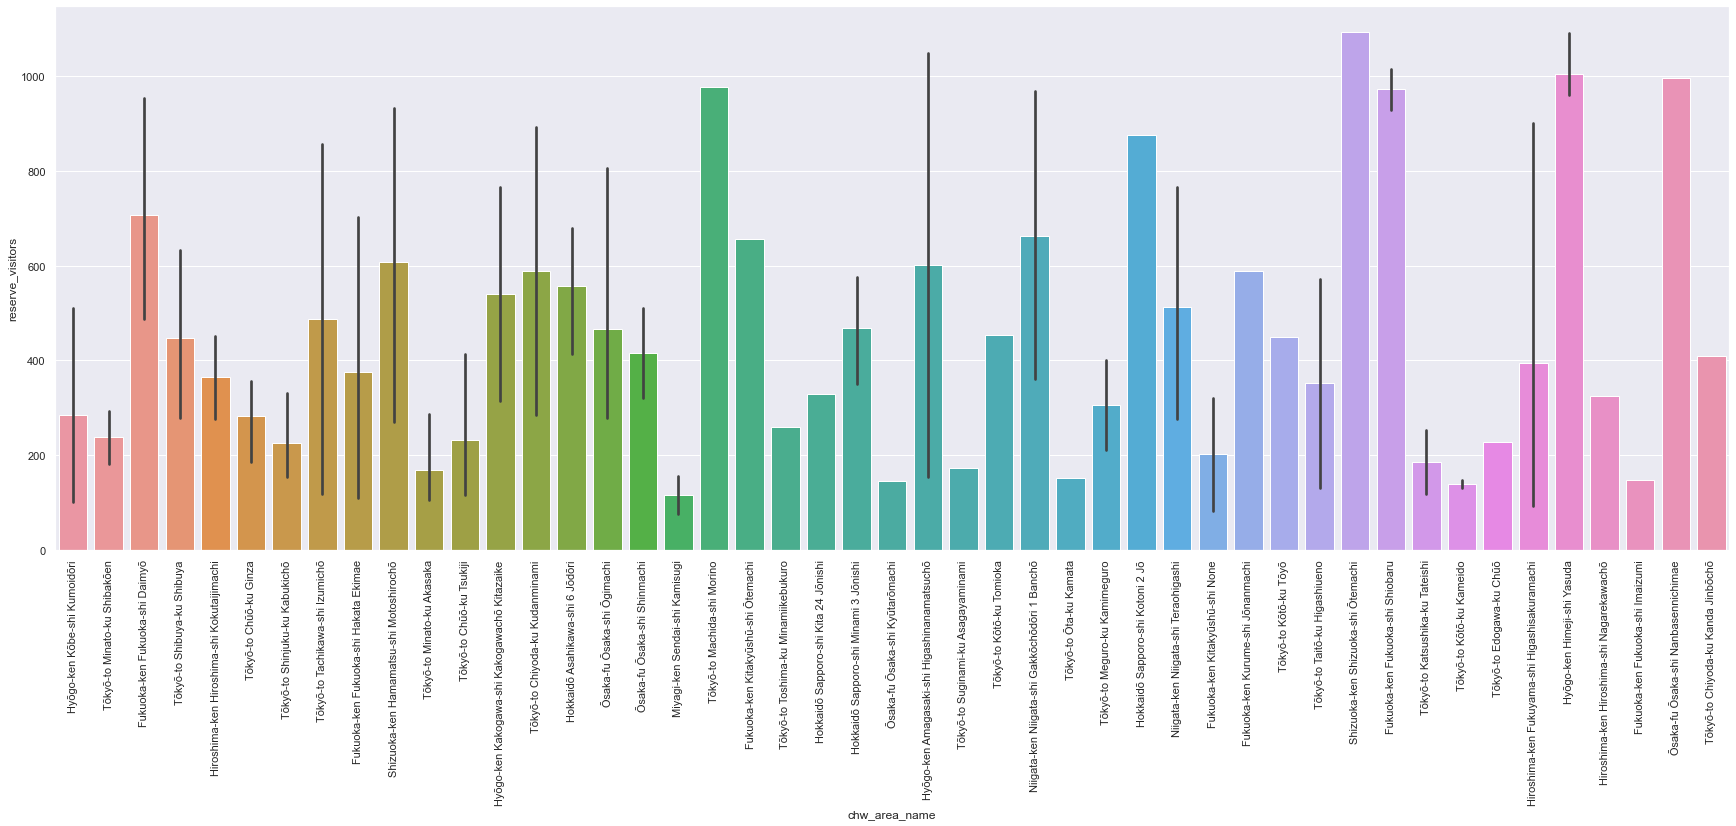

In [27]:
sns.barplot(x='chw_area_name', y='reserve_visitors', data=merge_chwAreaname_mergedStores)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Italian/French'),
  Text(1, 0, 'Dining bar'),
  Text(2, 0, 'Yakiniku/Korean food'),
  Text(3, 0, 'Cafe/Sweets'),
  Text(4, 0, 'Izakaya'),
  Text(5, 0, 'Okonomiyaki/Monja/Teppanyaki'),
  Text(6, 0, 'Bar/Cocktail'),
  Text(7, 0, 'Japanese food'),
  Text(8, 0, 'Creative cuisine'),
  Text(9, 0, 'Other'),
  Text(10, 0, 'Western food'),
  Text(11, 0, 'Karaoke/Party')])

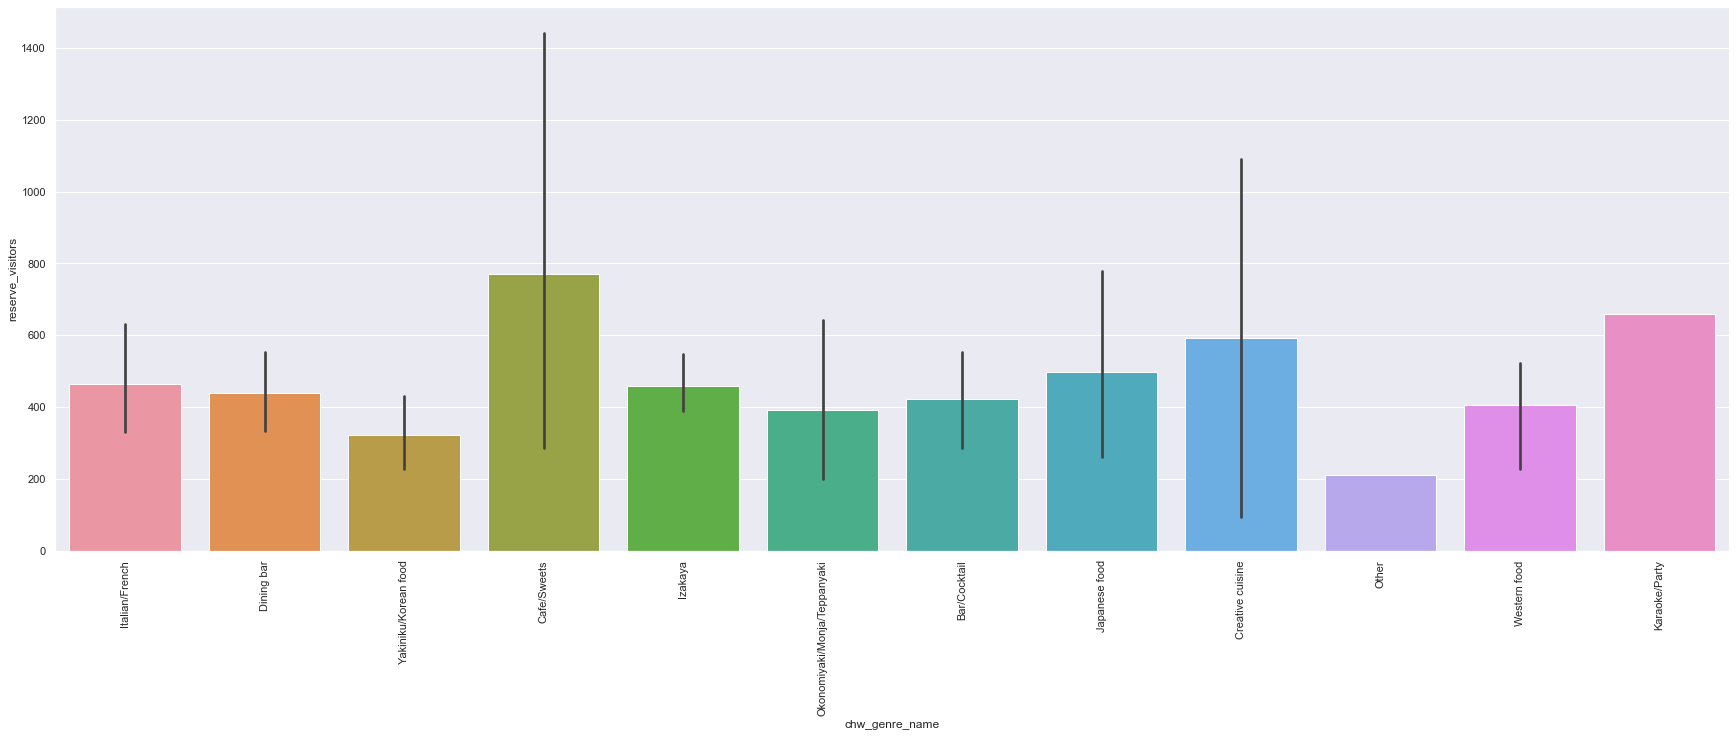

In [28]:
sns.barplot(x='chw_genre_name', y='reserve_visitors', data=merge_chwAreaname_mergedStores)
plt.xticks(rotation=90)

### 2. For Yomato  

In [29]:
yom_store_info_df_cpy = yom_store_info_df.copy()
yom_store_info_df = yom_store_info_df.drop(['latitude','longitude'],axis= 1,inplace=False)

In [30]:
yom_store_info_df.head()

,yom_store_id,yom_genre_name,yom_area_name
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō
2,hpg_2976f7acb4b3a3bc,Japanese style,Tōkyō-to Setagaya-ku Taishidō
3,hpg_e51a522e098f024c,Japanese style,Tōkyō-to Setagaya-ku Taishidō
4,hpg_e3d0e1519894f275,Japanese style,Tōkyō-to Setagaya-ku Taishidō


In [31]:
merged_yom_areaName = pd.merge(hpg,yom_store_info_df, on='yom_store_id', how='inner')

(119,)
(119, 1)


<AxesSubplot:xlabel='yom_area_name'>

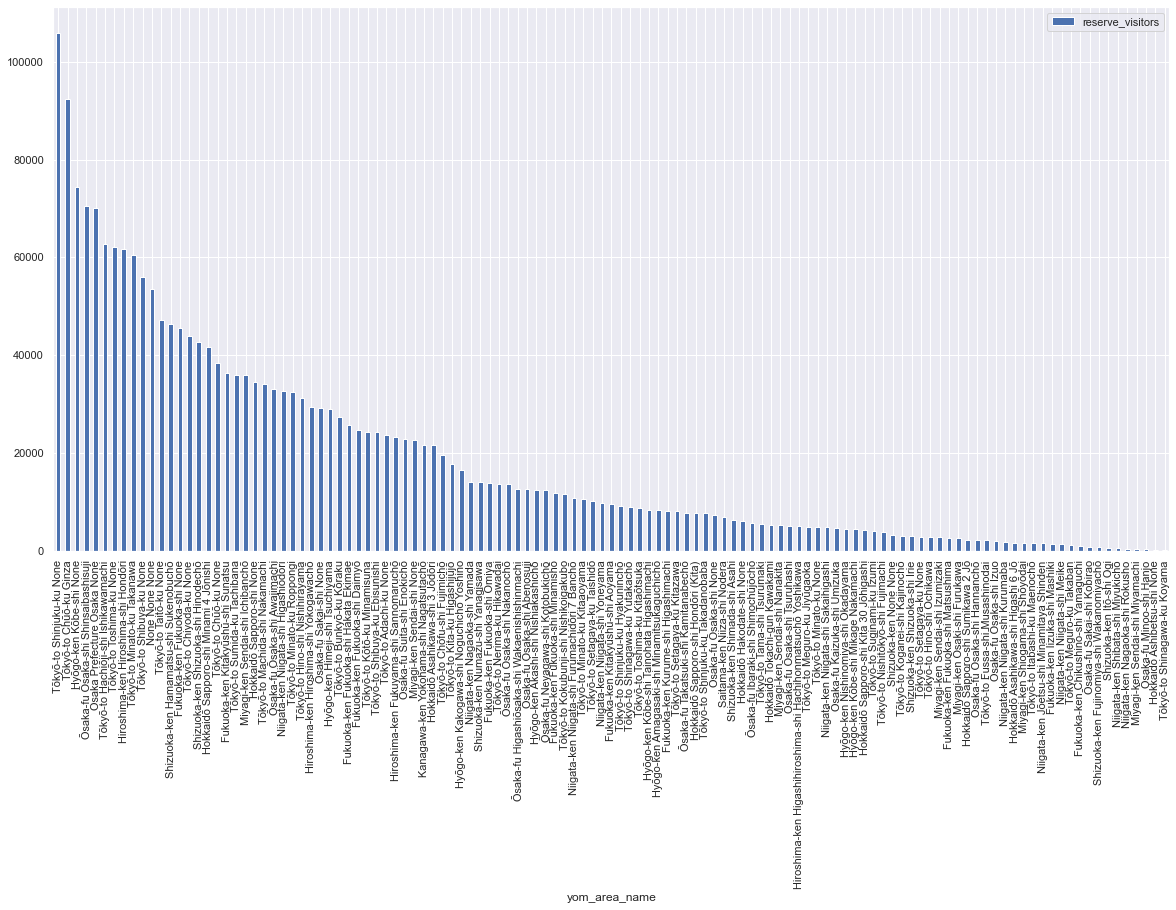

In [32]:
# merged_yom_areaName.head()
# merged_yom_areaName.shape
# merged_yom_areaName.plot(kind='line', x='yom_area_name', y='reserve_visitors')
print(merged_yom_areaName['yom_area_name'].unique().shape)
area_name_visitors= merged_yom_areaName.groupby('yom_area_name').sum()
area_name_visitors = area_name_visitors.sort_values(by='reserve_visitors', ascending=False)
print(area_name_visitors.shape)
area_name_visitors.plot(kind='bar', figsize=(20,10))
# sns.barplot(x= '' , y = 'reserve_visitors' ,data = area_name_visitors)

<AxesSubplot:xlabel='yom_genre_name'>

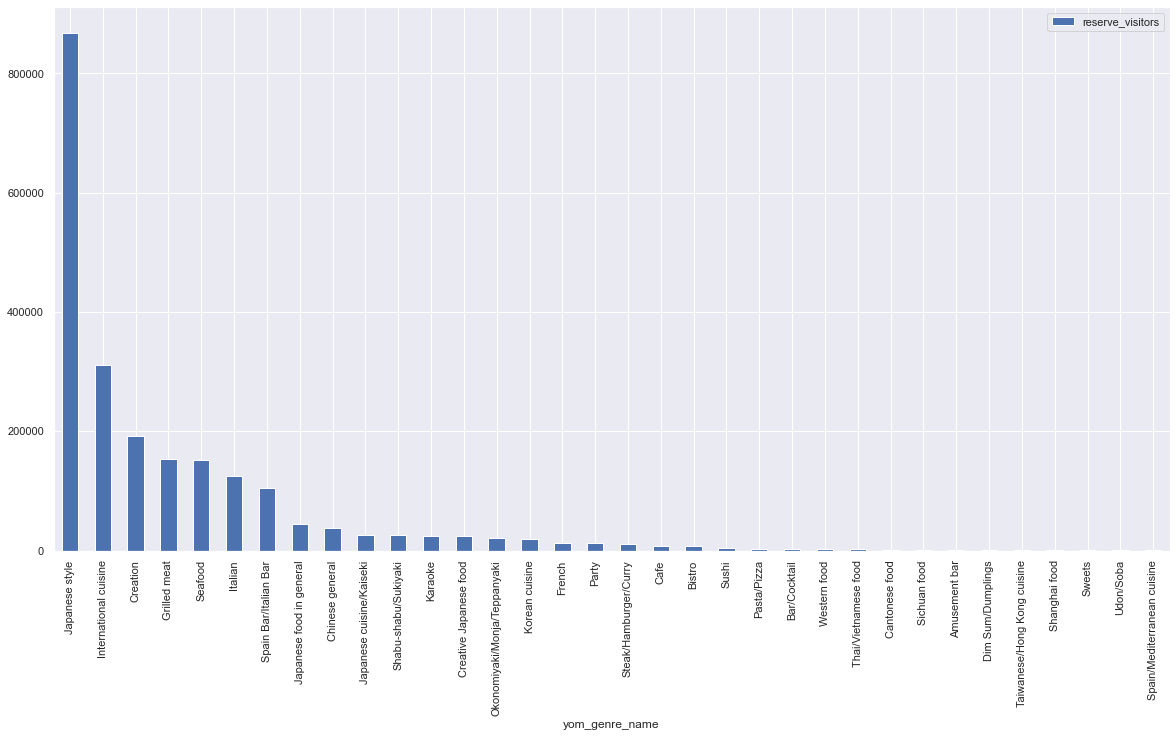

In [33]:
merged_yom_areaName['yom_genre_name'].unique().shape
genre_name_visitors= merged_yom_areaName.groupby('yom_genre_name').sum()
genre_name_visitors = genre_name_visitors.sort_values(by='reserve_visitors', ascending=False)
genre_name_visitors.plot(kind='bar', figsize=(20,10))

In [34]:
train_df['visit_date'] = pd.to_datetime(train_df['visit_date'])

train_df.sort_values(by = 'visit_date',inplace=True)

t = train_df.groupby('visit_date')['visitors'].sum()
moving_average = t.rolling(
    window=90,       # 90-day window
    center=True,      # puts the average at the center of the window
    min_periods=45,  # choose about half the window size
).mean()

<AxesSubplot:title={'center':'Visitors - 90-Day Moving Average'}, xlabel='visit_date'>

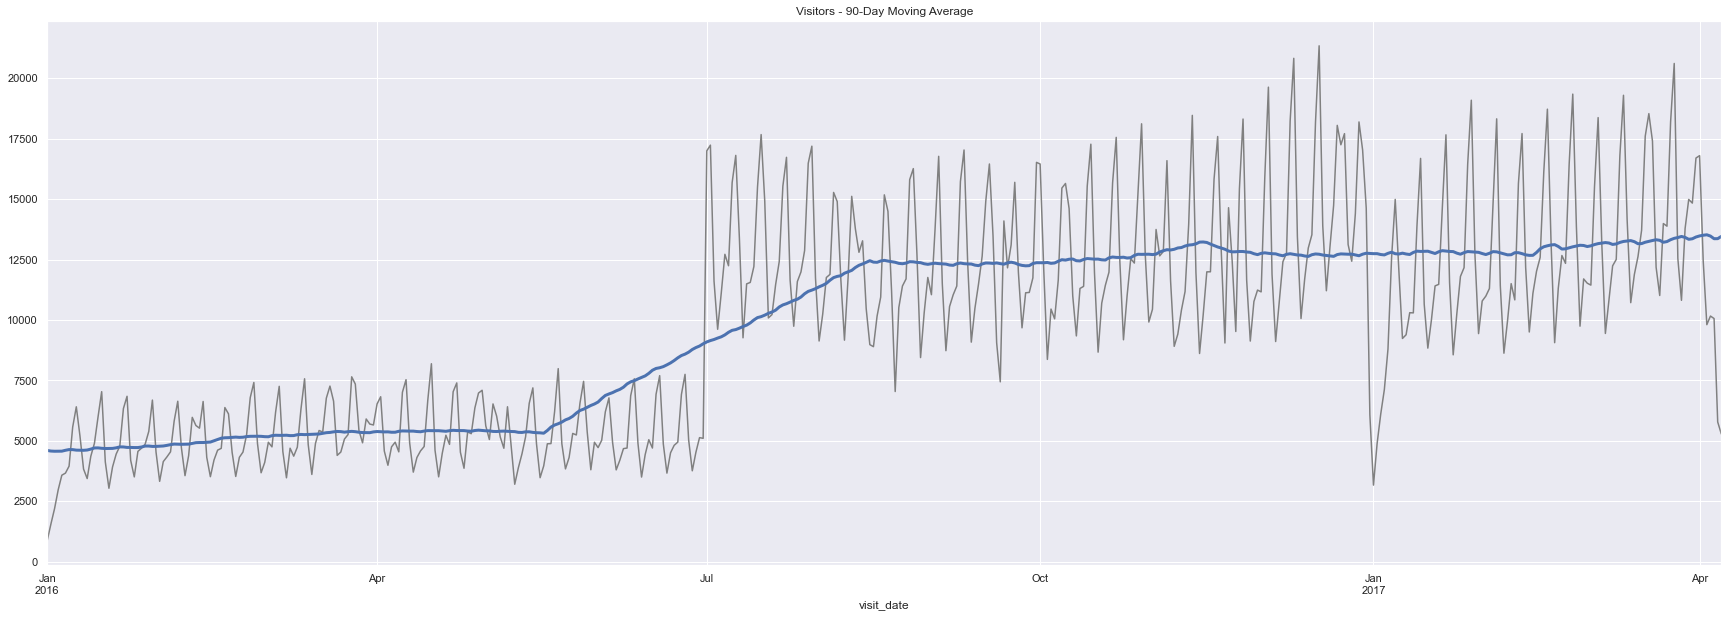

In [35]:
ax = t.plot(style="-", color="0.5")
moving_average.plot.line(
    ax=ax, linewidth=3, title="Visitors - 90-Day Moving Average", legend=False,
)

In [36]:
# print(train_df.head())
# housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
cols = chw_store_info_df_cpy[['chw_store_id','longitude','latitude']]
merged_df = pd.merge(train_df,cols,on='chw_store_id',how='inner')
merged_df = merged_df[['longitude','latitude','visitors']]
merged_df['average'] = (merged_df['longitude']+merged_df['latitude'])/2
p = merged_df.sort_values(by ='average')
p = p.drop('average',axis =1)
p_ = p.groupby(['longitude','latitude'])['visitors'].sum()

p_ = p_.reset_index() 
# p_=p_.pivot("longitude","latitude","visitors") 
print(p_)
p_= p_.sort_values(by = 'latitude')


# print(cols)

      longitude   latitude  visitors
0    130.195555  33.557320     27674
1    130.348436  33.581941     35712
2    130.350764  33.580827     18424
3    130.369976  33.575686     29702
4    130.392813  33.589216    334433
..          ...        ...       ...
103  141.353957  43.056819      3062
104  141.474789  43.036408     12741
105  142.364819  43.770635     73973
106  143.197959  42.994143      3314
107  144.273398  44.020632     21426

[108 rows x 3 columns]


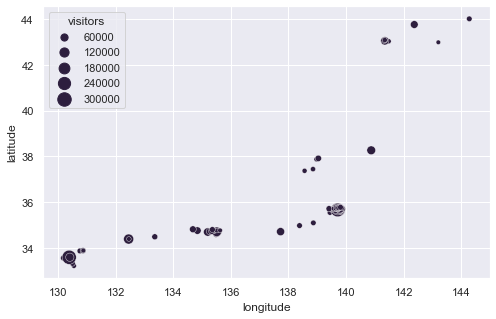

In [37]:
sns.set(rc={'figure.figsize':(8,5)})
sns.scatterplot(data=p_, x="longitude", y="latitude", hue="visitors" , size = "visitors", sizes=(20,200), hue_norm=(0, 7))

from IPython.display import Image
from IPython.core.display import HTML 

Image(url= "japan.png", width=500, height=400)

# FEATURE ENGINEERING

In [755]:
data = {
    'tra': pd.read_csv('Data/train.csv'),
    'as': pd.read_csv('Data/chw_store_info.csv'),
    'hs': pd.read_csv('Data/yom_store_info.csv'),
    'ar': pd.read_csv('Data/chw_reserve.csv'),
    'hr': pd.read_csv('Data/yom_reserve.csv'),
    'id': pd.read_csv('Data/store_id_relation.csv'),
    'tes': pd.read_csv('Data/test.csv'),
    'hol': pd.read_csv('Data/date_info.csv').rename(columns={'calendar_date':'visit_date'}),
    'ss': pd.read_csv('Data/sample_submission.csv')
    }

In [756]:
# Merge reservation data
data['hr'] = pd.merge(data['hr'], data['id'], how='inner', on=['yom_store_id'])
data['hr'] = data['hr'].drop(['yom_store_id'], axis=1)

merged_reserve_df = pd.concat([data['ar'], data['hr']])

In [757]:
# Convert the date into datetime format
merged_reserve_df['reserve_datetime'] = pd.to_datetime(merged_reserve_df['reserve_datetime'])
merged_reserve_df['visit_datetime'] = pd.to_datetime(merged_reserve_df['visit_datetime'])

In [758]:
# Create separate columns for visit date and time gap in hours between reservation and visit time
merged_reserve_df['visit_date'] = merged_reserve_df['visit_datetime'].dt.date
merged_reserve_df['visit_date'] = pd.to_datetime(merged_reserve_df['visit_date'])
merged_reserve_df['hour_gap'] = merged_reserve_df['visit_datetime'].sub(merged_reserve_df['reserve_datetime'])
merged_reserve_df['hour_gap'] = merged_reserve_df['hour_gap'].apply(lambda x: x/np.timedelta64(1,'h'))

In [759]:
# Making new columns based on different time gaps
merged_reserve_df['0-12_hour_gap'] = np.where(merged_reserve_df['hour_gap'] <= 12, merged_reserve_df['reserve_visitors'], 0)
merged_reserve_df['12-36_hour_gap'] = np.where((merged_reserve_df['hour_gap'] > 12) & (merged_reserve_df['hour_gap'] <= 36), merged_reserve_df['reserve_visitors'], 0)
merged_reserve_df['36-60_hour_gap'] = np.where((merged_reserve_df['hour_gap'] > 36) & (merged_reserve_df['hour_gap'] <= 60), merged_reserve_df['reserve_visitors'], 0)
merged_reserve_df['60-84_hour_gap'] = np.where((merged_reserve_df['hour_gap'] > 60) & (merged_reserve_df['hour_gap'] <= 84), merged_reserve_df['reserve_visitors'], 0)
merged_reserve_df['84+_hour_gap'] = np.where(merged_reserve_df['hour_gap'] > 84, merged_reserve_df['reserve_visitors'], 0)

In [760]:
new_cols = ['chw_store_id', 'visit_date', 'reserve_visitors', '0-12_hour_gap', '12-36_hour_gap', '36-60_hour_gap', '60-84_hour_gap', '84+_hour_gap']
merged_reserve_df = merged_reserve_df[new_cols].groupby(['chw_store_id', 'visit_date'], as_index=False).sum()

In [761]:
merged_reserve_df.dtypes

chw_store_id                object
visit_date          datetime64[ns]
reserve_visitors             int64
0-12_hour_gap                int64
12-36_hour_gap               int64
36-60_hour_gap               int64
60-84_hour_gap               int64
84+_hour_gap                 int64
dtype: object

In [762]:
# Feature that tells if next day is a holiday
data['hol']['next_day_holiday'] = np.zeros(data['hol'].shape[0])
data['hol']['next_day_holiday'].iloc[:-1] = data['hol']['holiday_flg'].copy().values[1:]

# Feature indicating working and non working days
data['hol']['non_working_day'] = np.where(data['hol']['day_of_week'].isin(['Saturday', 'Sunday']) | data['hol']['holiday_flg'] == 1, 1, 0)

C:\Users\Anirudh\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [763]:
data['hol'] = data['hol'].drop(['holiday_flg'], axis=1)

In [764]:
data['hol']['visit_date'] = pd.to_datetime(data['hol']['visit_date'])
data['hol']

,visit_date,day_of_week,next_day_holiday,non_working_day
0,2016-01-01,Friday,1.0,1
1,2016-01-02,Saturday,1.0,1
2,2016-01-03,Sunday,0.0,1
3,2016-01-04,Monday,0.0,0
4,2016-01-05,Tuesday,0.0,0
...,...,...,...,...
512,2017-05-27,Saturday,0.0,1
513,2017-05-28,Sunday,0.0,1
514,2017-05-29,Monday,0.0,0
515,2017-05-30,Tuesday,0.0,0


In [765]:
data['tra']['visit_date'] = pd.to_datetime(data['tra']['visit_date'])
data['tra']

,chw_store_id,visit_date,visitors
0,air_3561fd1c0bce6a95,2016-08-25,8
1,air_26c5bbeb7bb82bf1,2017-01-11,9
2,air_c1ff20617c54fee7,2016-08-10,13
3,air_310e467e6e625004,2017-03-10,17
4,air_671b4bea84dafb67,2016-06-01,34
...,...,...,...
215700,air_e053c561f32acc28,2016-07-20,27
215701,air_74cf22153214064c,2016-12-06,3
215702,air_287d2de7d3c93406,2016-12-20,24
215703,air_2570ccb93badde68,2016-07-06,28


In [766]:
chw_visit_wd = data['tra'].join(data['hol'].set_index('visit_date'), on='visit_date')
chw_visit_wd.head()

,chw_store_id,visit_date,visitors,day_of_week,next_day_holiday,non_working_day
0,air_3561fd1c0bce6a95,2016-08-25,8,Thursday,0.0,0
1,air_26c5bbeb7bb82bf1,2017-01-11,9,Wednesday,0.0,0
2,air_c1ff20617c54fee7,2016-08-10,13,Wednesday,1.0,0
3,air_310e467e6e625004,2017-03-10,17,Friday,0.0,0
4,air_671b4bea84dafb67,2016-06-01,34,Wednesday,0.0,0


In [767]:
# Mean, median and max of visitors by restaurant

visitors_mean = chw_visit_wd[['visitors', 'chw_store_id', 'non_working_day']].groupby(['chw_store_id', 'non_working_day'], as_index=False).mean()
visitors_mean = visitors_mean.rename(columns={'visitors': 'visitors_mean'})

visitors_median = chw_visit_wd[['visitors', 'chw_store_id', 'non_working_day']].groupby(['chw_store_id', 'non_working_day'], as_index=False).median()
visitors_median = visitors_median.rename(columns={'visitors': 'visitors_median'})

visitors_max = chw_visit_wd[['visitors', 'chw_store_id', 'non_working_day']].groupby(['chw_store_id', 'non_working_day'], as_index=False).max()
visitors_max = visitors_max.rename(columns={'visitors': 'visitors_max'})

In [768]:
chw_genre_area = data['as'].copy()
chw_genre_area = chw_genre_area[['chw_store_id', 'chw_genre_name', 'chw_area_name']].groupby(['chw_genre_name', 'chw_area_name'], as_index=False).count()
chw_genre_area = chw_genre_area.rename(columns={'chw_store_id': 'genre_area'})

In [769]:
chw_area_res = data['as'].copy()
chw_area_res = chw_area_res[['chw_store_id', 'chw_area_name']].groupby(['chw_area_name'], as_index=False).count()
chw_area_res = chw_area_res.rename(columns={'chw_store_id': 'area_res'})

In [770]:
data['tra']['month'] = data['tra']['visit_date'].dt.month

data['tra'] = data['tra'].join(data['hol'].set_index('visit_date'), on = 'visit_date')
data['tra'] = data['tra'].join(data['as'].set_index('chw_store_id'), on = 'chw_store_id')

data['tra'] = pd.merge(data['tra'], chw_genre_area, left_on = ['chw_genre_name', 'chw_area_name'], right_on = ['chw_genre_name', 'chw_area_name'], how = 'left')
data['tra'] = pd.merge(data['tra'], chw_area_res, left_on = ['chw_area_name'],right_on = ['chw_area_name'], how = 'left')

data['tra'] = pd.merge(data['tra'], merged_reserve_df, how = 'left', left_on = ['chw_store_id', 'visit_date'],right_on = ['chw_store_id', 'visit_date'])

data['tra'] = pd.merge(data['tra'], visitors_mean, how = 'left',left_on = ['chw_store_id', 'non_working_day'],right_on = ['chw_store_id', 'non_working_day'])
data['tra'] = pd.merge(data['tra'], visitors_median, how = 'left',left_on = ['chw_store_id', 'non_working_day'],right_on = ['chw_store_id', 'non_working_day'])
data['tra'] = pd.merge(data['tra'], visitors_max, how = 'left',left_on = ['chw_store_id', 'non_working_day'],right_on = ['chw_store_id', 'non_working_day'])

data['tra'].fillna(0)

data['tra']['id'] = data['tra']['chw_store_id'] + '_' + data['tra']['visit_date'].apply(lambda x: x.strftime('%#m/%#d/%Y'))

data['tra']['visit_month'] = data['tra']['visit_date'].dt.month
data['tra']['visit_day_of_week'] = data['tra']['visit_date'].dt.dayofweek
data['tra']['visit_day_of_month'] = data['tra']['visit_date'].dt.day
data['tra']['visit_year'] = data['tra']['visit_date'].dt.year
data['tra']['week_of_year'] = data['tra']['visit_date'].dt.weekofyear
data['tra'].loc[data['tra'].week_of_year == 53, 'week_of_year'] = 0

C:\Users\Anirudh\AppData\Local\Temp/ipykernel_3240/548295865.py:29: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data['tra']['week_of_year'] = data['tra']['visit_date'].dt.weekofyear


In [771]:
data['tra'].head()

,chw_store_id,visit_date,visitors,month,day_of_week,next_day_holiday,non_working_day,chw_genre_name,chw_area_name,latitude,...,visitors_max,long_lat_sum,var_max_lat,var_max_long,id,visit_month,visit_day_of_week,visit_day_of_month,visit_year,week_of_year
0,air_3561fd1c0bce6a95,2016-08-25,8,8,Thursday,0.0,0,Italian/French,Tōkyō-to Ōta-ku Kamiikedai,35.602201,...,31,5.172186,8.418431,4.575709,air_3561fd1c0bce6a95_8/25/2016,8,3,25,2016,34
1,air_26c5bbeb7bb82bf1,2017-01-11,9,1,Wednesday,0.0,0,Cafe/Sweets,Tōkyō-to Kita-ku Ōjihonchō,35.752804,...,57,5.173243,8.267828,4.539918,air_26c5bbeb7bb82bf1_1/11/2017,1,2,11,2017,2
2,air_c1ff20617c54fee7,2016-08-10,13,8,Wednesday,1.0,0,Izakaya,Tōkyō-to Meguro-ku Kamimeguro,35.641463,...,16,5.172412,8.379169,4.575227,air_c1ff20617c54fee7_8/10/2016,8,2,10,2016,32
3,air_310e467e6e625004,2017-03-10,17,3,Friday,0.0,0,Italian/French,Tōkyō-to Chūō-ku Tsukiji,35.670651,...,35,5.172995,8.349981,4.501537,air_310e467e6e625004_3/10/2017,3,4,10,2017,10
4,air_671b4bea84dafb67,2016-06-01,34,6,Wednesday,0.0,0,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,...,53,5.172809,8.362564,4.521799,air_671b4bea84dafb67_6/1/2016,6,2,1,2016,22


In [772]:
data['ss']['chw_store_id'] = data['ss']['id'].map(lambda x: '_'.join(x.split('_')[:2]))
data['ss']['visit_date'] = data['ss']['id'].map(lambda x: str(x).split('_')[2])
data['ss']['visit_date'] = pd.to_datetime(data['ss']['visit_date'])

data['ss']['month'] = data['ss']['visit_date'].dt.month

data['ss'] = data['ss'].join(data['hol'].set_index('visit_date'), on = 'visit_date')
data['ss'] = data['ss'].join(data['as'].set_index('chw_store_id'), on = 'chw_store_id')

data['ss'] = pd.merge(data['ss'], chw_genre_area, left_on = ['chw_genre_name', 'chw_area_name'], right_on = ['chw_genre_name', 'chw_area_name'], how = 'left')
data['ss'] = pd.merge(data['ss'], chw_area_res, left_on = ['chw_area_name'],right_on = ['chw_area_name'], how = 'left')

data['ss'] = pd.merge(data['ss'], merged_reserve_df, how = 'left', left_on = ['chw_store_id', 'visit_date'],right_on = ['chw_store_id', 'visit_date'])

data['ss'] = pd.merge(data['ss'], visitors_mean, how = 'left',left_on = ['chw_store_id', 'non_working_day'],right_on = ['chw_store_id', 'non_working_day'])
data['ss'] = pd.merge(data['ss'], visitors_median, how = 'left',left_on = ['chw_store_id', 'non_working_day'],right_on = ['chw_store_id', 'non_working_day'])
data['ss'] = pd.merge(data['ss'], visitors_max, how = 'left',left_on = ['chw_store_id', 'non_working_day'],right_on = ['chw_store_id', 'non_working_day'])

data['ss'].fillna(0)

data['ss']['id'] = data['ss']['chw_store_id'] + '_' + data['ss']['visit_date'].apply(lambda x: x.strftime('%#m/%#d/%Y'))

data['ss']['visit_month'] = data['ss']['visit_date'].dt.month
data['ss']['visit_day_of_week'] = data['ss']['visit_date'].dt.dayofweek
data['ss']['visit_day_of_month'] = data['ss']['visit_date'].dt.day
data['ss']['visit_year'] = data['ss']['visit_date'].dt.year
data['ss']['week_of_year'] = data['ss']['visit_date'].dt.weekofyear
data['ss'].loc[data['ss'].week_of_year == 53, 'week_of_year'] = 0

C:\Users\Anirudh\AppData\Local\Temp/ipykernel_3240/1503571036.py:33: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data['ss']['week_of_year'] = data['ss']['visit_date'].dt.weekofyear


In [773]:
data['ss'].head()

,id,visitors,chw_store_id,visit_date,month,day_of_week,next_day_holiday,non_working_day,chw_genre_name,chw_area_name,...,visitors_median,visitors_max,long_lat_sum,var_max_lat,var_max_long,visit_month,visit_day_of_week,visit_day_of_month,visit_year,week_of_year
0,air_e7d2ac6d53d1b744_12/9/2016,0,air_e7d2ac6d53d1b744,2016-12-09,12,Friday,0.0,0,Cafe/Sweets,Tōkyō-to Suginami-ku Asagayaminami,...,12.0,27,5.172391,8.321066,4.636960,12,4,9,2016,49
1,air_55c3627912b9c849_2/1/2016,0,air_55c3627912b9c849,2016-02-01,2,Monday,0.0,0,Italian/French,Fukuoka-ken Fukuoka-shi Hakata Ekimae,...,12.0,34,5.105983,10.429274,13.858520,2,0,1,2016,5
2,air_d1418d6fd6d634f2_9/16/2016,0,air_d1418d6fd6d634f2,2016-09-16,9,Friday,0.0,0,Izakaya,Hyōgo-ken Kōbe-shi Motomachidōri,...,18.0,55,5.140935,9.332390,9.086145,9,4,16,2016,37
3,air_88ca84051ba95339_1/19/2016,0,air_88ca84051ba95339,2016-01-19,1,Tuesday,0.0,0,Japanese food,Tōkyō-to Shinagawa-ku Hiromachi,...,31.0,76,5.172411,8.411406,4.543212,1,1,19,2016,3
4,air_4d71826793c09b22_1/10/2017,0,air_4d71826793c09b22,2017-01-10,1,Tuesday,0.0,0,Japanese food,Tōkyō-to Minato-ku Shibakōen,...,21.0,38,5.172809,8.362564,4.521799,1,1,10,2017,2


In [774]:
cols = [i for i in data['tra'].columns if i in data['ss'].columns]
train = data['tra'].copy()
test = data['ss'].copy()

In [775]:
tmp1 = train[['visitors','chw_store_id','visit_day_of_week']].groupby(['chw_store_id','visit_day_of_week']).agg('mean').reset_index()
tmp1.columns = ['chw_store_id','visit_day_of_week','store_dayofw_mean_visitors']

tmp2 = train[['visitors','chw_store_id','visit_day_of_week']].groupby(['chw_store_id','visit_day_of_week']).agg('median').reset_index()
tmp2.columns = ['chw_store_id','visit_day_of_week','store_dayofw_median_visitors']

tmp3 = train[['visitors','chw_store_id','visit_day_of_week']].groupby(['chw_store_id','visit_day_of_week']).agg('max').reset_index()
tmp3.columns = ['chw_store_id','visit_day_of_week','store_dayofw_max_visitors']

tmp7 = train[['visitors','chw_store_id']].groupby('chw_store_id').agg('mean').reset_index()
tmp7.columns = ['chw_store_id','store_mean_visitors']

tmp8 = train[['visitors','chw_store_id']].groupby('chw_store_id').agg('median').reset_index()
tmp8.columns = ['chw_store_id','store_median_visitors']

tmp9 = train[['visitors','chw_store_id']].groupby('chw_store_id').agg('max').reset_index()
tmp9.columns = ['chw_store_id','store_max_visitors']

tmp13 = train[['visitors','chw_store_id','visit_month']].groupby(['chw_store_id','visit_month']).agg('mean').reset_index()
tmp13.columns = ['chw_store_id','visit_month','store_month_mean_visitors']

tmp14 = train[['visitors','chw_store_id','visit_month']].groupby(['chw_store_id','visit_month']).agg('median').reset_index()
tmp14.columns = ['chw_store_id','visit_month','store_month_median_visitors']

tmp15 = train[['visitors','chw_store_id','visit_month']].groupby(['chw_store_id','visit_month']).agg('max').reset_index()
tmp15.columns = ['chw_store_id','visit_month','store_month_max_visitors']

In [776]:
train = train[cols]
test = test[cols]

train = train.merge(tmp1,on=['chw_store_id','visit_day_of_week'],how='left')
test = test.merge(tmp1,on= ['chw_store_id','visit_day_of_week'],how='left')

train = train.merge(tmp2,on=['chw_store_id','visit_day_of_week'],how='left')
test = test.merge(tmp2,on= ['chw_store_id','visit_day_of_week'],how='left')

train = train.merge(tmp3,on=['chw_store_id','visit_day_of_week'],how='left')
test = test.merge(tmp3,on= ['chw_store_id','visit_day_of_week'],how='left')


train = train.merge(tmp7,on=['chw_store_id'],how='left')
test = test.merge(tmp7,on= ['chw_store_id'],how='left')

train = train.merge(tmp8,on=['chw_store_id'],how='left')
test = test.merge(tmp8,on= ['chw_store_id'],how='left')

train = train.merge(tmp9,on=['chw_store_id'],how='left')
test = test.merge(tmp9,on= ['chw_store_id'],how='left')


train = train.merge(tmp13,on=['chw_store_id','visit_month'],how='left')
test = test.merge(tmp13,on= ['chw_store_id','visit_month'],how='left')

train = train.merge(tmp14,on=['chw_store_id','visit_month'],how='left')
test = test.merge(tmp14,on= ['chw_store_id','visit_month'],how='left')

train = train.merge(tmp15,on=['chw_store_id','visit_month'],how='left')
test = test.merge(tmp15,on= ['chw_store_id','visit_month'],how='left')

train.replace(np.nan,-1,inplace=True)
test.replace(np.nan,-1,inplace=True)

In [777]:
train[['area1', 'area2', 'area3', '4', '5']] = train.chw_area_name.str.split(pat=' ', expand=True)
train.drop(columns=['area3','4','5'],axis=1,inplace=True)

test[['area1', 'area2', 'area3', '4', '5']] = test.chw_area_name.str.split(pat=' ', expand=True)
test.drop(columns=['area3','4','5'],axis=1,inplace=True)

In [778]:
d = pd.get_dummies(train.area1)
d2 = pd.get_dummies(train.chw_genre_name)
train = pd.concat([train, d, d2], axis=1)

d = pd.get_dummies(test.area1)
d2 = pd.get_dummies(test.chw_genre_name)
test = pd.concat([test, d, d2], axis=1)

In [779]:
train = train.drop(['chw_store_id', u'visit_date', u'month', u'day_of_week', u'chw_area_name', 'visit_year', u'latitude', u'longitude'], axis=1)
train.head()

,visitors,next_day_holiday,non_working_day,chw_genre_name,genre_area,area_res,reserve_visitors,0-12_hour_gap,12-36_hour_gap,36-60_hour_gap,...,Dining bar,International cuisine,Italian/French,Izakaya,Japanese food,Karaoke/Party,Okonomiyaki/Monja/Teppanyaki,Other,Western food,Yakiniku/Korean food
0,8,0.0,0,Italian/French,2,4,-1.0,-1.0,-1.0,-1.0,...,0,0,1,0,0,0,0,0,0,0
1,9,0.0,0,Cafe/Sweets,2,2,-1.0,-1.0,-1.0,-1.0,...,0,0,0,0,0,0,0,0,0,0
2,13,1.0,0,Izakaya,5,22,-1.0,-1.0,-1.0,-1.0,...,0,0,0,1,0,0,0,0,0,0
3,17,0.0,0,Italian/French,10,29,-1.0,-1.0,-1.0,-1.0,...,0,0,1,0,0,0,0,0,0,0
4,34,0.0,0,Japanese food,7,51,-1.0,-1.0,-1.0,-1.0,...,0,0,0,0,1,0,0,0,0,0


In [780]:
test = test.drop(['chw_store_id', u'visit_date', u'month', u'day_of_week', u'chw_area_name', 'visit_year', u'latitude', u'longitude'], axis=1)
test.head()

,visitors,next_day_holiday,non_working_day,chw_genre_name,genre_area,area_res,reserve_visitors,0-12_hour_gap,12-36_hour_gap,36-60_hour_gap,...,Dining bar,International cuisine,Italian/French,Izakaya,Japanese food,Karaoke/Party,Okonomiyaki/Monja/Teppanyaki,Other,Western food,Yakiniku/Korean food
0,0,0.0,0,Cafe/Sweets,8,21,-1.0,-1.0,-1.0,-1.0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.0,0,Italian/French,2,16,-1.0,-1.0,-1.0,-1.0,...,0,0,1,0,0,0,0,0,0,0
2,0,0.0,0,Izakaya,2,2,-1.0,-1.0,-1.0,-1.0,...,0,0,0,1,0,0,0,0,0,0
3,0,0.0,0,Japanese food,2,5,-1.0,-1.0,-1.0,-1.0,...,0,0,0,0,1,0,0,0,0,0
4,0,0.0,0,Japanese food,7,51,-1.0,-1.0,-1.0,-1.0,...,0,0,0,0,1,0,0,0,0,0


In [781]:
train1 = train.drop(['id'], axis=1)
test1 = test.drop(['id', 'visitors'], axis=1)

In [782]:
new_cols = ['next_day_holiday', 'non_working_day',
       'genre_area', 'area_res', 'reserve_visitors',
       '0-12_hour_gap', '12-36_hour_gap', '36-60_hour_gap',
       '60-84_hour_gap', '84+_hour_gap', 'visitors_mean',
       'visitors_median', 'visitors_max', 'visit_month',
       'visit_day_of_week', 'visit_day_of_month', 'week_of_year',
       'store_dayofw_mean_visitors', 'store_dayofw_median_visitors',
       'store_dayofw_max_visitors',  'store_mean_visitors',
       'store_median_visitors', 'store_max_visitors', 'store_month_mean_visitors', 
       'store_month_median_visitors','store_month_max_visitors',
       'Fukuoka-ken', 'Hiroshima-ken', 'Hokkaidō', 'Hyōgo-ken', 'Miyagi-ken',
       'Niigata-ken', 'Shizuoka-ken', 'Tōkyō-to', 'Ōsaka-fu', 'Asian',
       'Bar/Cocktail', 'Cafe/Sweets', 'Creative cuisine', 'Dining bar',
       'International cuisine', 'Italian/French', 'Izakaya', 'Japanese food',
       'Karaoke/Party', 'Okonomiyaki/Monja/Teppanyaki', 'Other',
       'Western food', 'Yakiniku/Korean food']

In [783]:
y = train1['visitors']
X = train1[new_cols]
test_x = test1[new_cols]

In [784]:
test_x

,next_day_holiday,non_working_day,genre_area,area_res,reserve_visitors,0-12_hour_gap,12-36_hour_gap,36-60_hour_gap,60-84_hour_gap,84+_hour_gap,...,Dining bar,International cuisine,Italian/French,Izakaya,Japanese food,Karaoke/Party,Okonomiyaki/Monja/Teppanyaki,Other,Western food,Yakiniku/Korean food
0,0.0,0,8,21,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0,2,16,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0,0,1,0,0,0,0,0,0,0
2,0.0,0,2,2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0,0,0,1,0,0,0,0,0,0
3,0.0,0,2,5,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0,0,0,0,1,0,0,0,0,0
4,0.0,0,7,51,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23963,0.0,0,9,64,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0,0,1,0,0,0,0,0,0,0
23964,0.0,0,2,4,9.0,0.0,0.0,0.0,0.0,9.0,...,0,0,0,1,0,0,0,0,0,0
23965,0.0,0,7,25,7.0,0.0,0.0,0.0,0.0,7.0,...,1,0,0,0,0,0,0,0,0,0
23966,0.0,0,3,23,5.0,5.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0


In [785]:
from sklearn import linear_model, metrics

model1 = linear_model.LinearRegression()

model1.fit(X, y)

preds1 = model1.predict(test_x)

final_submissions = test[['id','visitors']]
final_submissions['id'] = test[['id']]
final_submissions['visitors'] = pd.DataFrame({'visitors': preds1})

final_submissions = final_submissions.reindex(['id','visitors'],axis=1)

final_submissions.to_csv('submission1.csv',index = False)

C:\Users\Anirudh\AppData\Local\Temp/ipykernel_3240/1530059705.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_submissions['id'] = test[['id']]
C:\Users\Anirudh\AppData\Local\Temp/ipykernel_3240/1530059705.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_submissions['visitors'] = pd.DataFrame({'visitors': preds1})


In [786]:
# from sklearn import neighbors

# model2 = neighbors.KNeighborsRegressor(n_jobs = -1, n_neighbors=5)

# model2.fit(train[col], np.log1p(train['visitors'].values))

# preds2 = model2.predict(train[col])

# print(metrics.mean_squared_error(np.log1p(train['visitors'].values), preds2)**0.5)

In [788]:
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=60)

xgbRegressor = xg.XGBRegressor(objective='reg:linear', n_estimators=10, seed=60)

xgbRegressor.fit(train_X, train_y)

pred = xgbRegressor.predict(test_X)

print(np.sqrt(mean_squared_log_error(test_y, pred)))

[09:47:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
0.5063305259590218


In [789]:
y_pred_xgb = xgbRegressor.predict(test_x)

sub_xg = test[['id', 'visitors']]
sub_xg['id'] = test[['id']]
sub_xg['visitors'] = pd.DataFrame({'visitors': y_pred_xgb})
sub_xg = sub_xg.reindex(['id', 'visitors'], axis=1)

sub_xg.to_csv('submission3.csv', index=False)

C:\Users\Anirudh\AppData\Local\Temp/ipykernel_3240/1092774096.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_xg['id'] = test[['id']]
C:\Users\Anirudh\AppData\Local\Temp/ipykernel_3240/1092774096.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_xg['visitors'] = pd.DataFrame({'visitors': y_pred_xgb})


In [799]:
import lightgbm as lgb

parameters = {}

lgb_train_x = lgb.Dataset(X, label=y)
model = lgb.train(parameters, lgb_train_x)
lgb_pred = model.predict(test_x)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.033740 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3098
[LightGBM] [Info] Number of data points in the train set: 215705, number of used features: 52
[LightGBM] [Info] Start training from score 20.947646


In [800]:
sub_lgb = test[['id', 'visitors']]
sub_lgb['id'] = test[['id']]
sub_lgb['visitors'] = pd.DataFrame({'visitors': lgb_pred})
sub_lgb = sub_lgb.reindex(['id', 'visitors'], axis=1)

sub_lgb.to_csv('submission4.csv', index=False)

C:\Users\Anirudh\AppData\Local\Temp/ipykernel_3240/973888084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_lgb['id'] = test[['id']]
C:\Users\Anirudh\AppData\Local\Temp/ipykernel_3240/973888084.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_lgb['visitors'] = pd.DataFrame({'visitors': lgb_pred})
